Content: (Vehicle_Classification)

1.   Preprocessing
2.   Decision Tree
3.   RandomForest
4.   GridSearchCV
5.   Bagging
6. Voting
7. LogisticRegression
8. SVC
9. GradientBoosting
10. XGBClassifier

**1- Preprocessing**




In [1]:
import numpy as np
np.random.seed(1)
random_state=1

In [11]:
import pandas as pd
import urllib.request
import os

data_path = os.path.join("datasets", "")
download_path = "https://raw.githubusercontent.com/zakariae20/datasets/main/"
os.makedirs(data_path, exist_ok=True)
url = download_path + 'vehicle.csv'
urllib.request.urlretrieve(url, data_path + "vehicle.csv")
data = pd.read_csv(data_path + "vehicle.csv", thousands=',')
gdp_per_capita = pd.read_csv(data_path + "vehicle.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

In [12]:
data.shape

(846, 19)

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Class'] = label_encoder.fit_transform(data['Class'])

In [14]:
Data = data.drop('Class', axis='columns')
target = data['Class']

In [15]:
target

0      3
1      3
2      2
3      3
4      0
      ..
841    2
842    3
843    2
844    2
845    3
Name: Class, Length: 846, dtype: int64

In [16]:
feature_names = Data.columns
feature_names

Index(['COMPACTNESS', 'CIRCULARITY', 'DISTANCE_CIRCULARITY', 'RADIUS_RATIO',
       'PR.AXIS_ASPECT_RATIO', 'MAX.LENGTH_ASPECT_RATIO', 'SCATTER_RATIO',
       'ELONGATEDNESS', 'PR.AXIS_RECTANGULARITY', 'MAX.LENGTH_RECTANGULARITY',
       'SCALED_VARIANCE_MAJOR', 'SCALED_VARIANCE_MINOR',
       'SCALED_RADIUS_OF_GYRATION', 'SKEWNESS_ABOUT_MAJOR',
       'SKEWNESS_ABOUT_MINOR', 'KURTOSIS_ABOUT_MAJOR', 'KURTOSIS_ABOUT_MINOR',
       'HOLLOWS_RATIO'],
      dtype='object')

In [17]:
from sklearn.model_selection import train_test_split
X = Data
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

**2-DecisionTree**

In [19]:
from sklearn.tree import DecisionTreeClassifier
vehicle_clf = DecisionTreeClassifier(max_depth=5, random_state=random_state)
vehicle_clf = vehicle_clf.fit(X_train, y_train)

In [20]:
vehicle_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [21]:
predictions = vehicle_clf.predict(X_test)
predictions

array([3, 0, 0, 0, 1, 1, 3, 3, 2, 3, 3, 3, 2, 1, 0, 2, 3, 1, 3, 0, 2, 1,
       1, 1, 2, 3, 0, 1, 1, 1, 3, 2, 0, 3, 3, 2, 0, 1, 0, 0, 1, 3, 3, 2,
       3, 2, 3, 2, 1, 1, 1, 2, 0, 1, 1, 3, 1, 1, 3, 0, 2, 3, 1, 3, 0, 1,
       1, 1, 1, 0, 1, 3, 1, 3, 0, 1, 1, 2, 3, 1, 2, 3, 1, 1, 0])

In [22]:
vehicle_clf.score(X_test,y_test)

0.7294117647058823

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.71      0.76      0.73        29
           2       0.29      0.27      0.28        15
           3       0.83      0.83      0.83        24

    accuracy                           0.73        85
   macro avg       0.71      0.70      0.70        85
weighted avg       0.73      0.73      0.73        85



In [24]:
feature_importance = pd.DataFrame(vehicle_clf.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

,0
MAX.LENGTH_ASPECT_RATIO,0.296889
SCALED_VARIANCE_MINOR,0.163169
ELONGATEDNESS,0.163151
COMPACTNESS,0.076279
DISTANCE_CIRCULARITY,0.054554
SKEWNESS_ABOUT_MINOR,0.049607
MAX.LENGTH_RECTANGULARITY,0.038833
PR.AXIS_ASPECT_RATIO,0.031805
CIRCULARITY,0.024757
SCATTER_RATIO,0.023086


<Axes: >

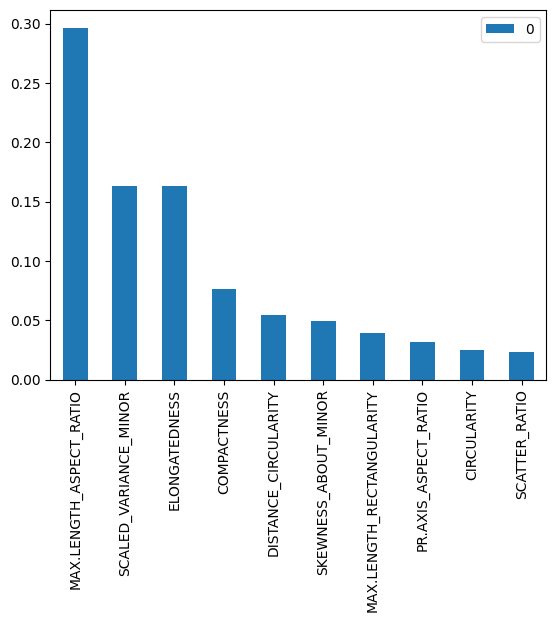

In [ ]:
feature_importance.head(10).plot(kind='bar')

[Text(0.49278846153846156, 0.9166666666666666, 'ELONGATEDNESS <= 41.5\ngini = 0.749\nsamples = 761\nvalue = [201, 183, 202, 175]'),
 Text(0.22115384615384615, 0.75, 'MAX.LENGTH_ASPECT_RATIO <= 7.5\ngini = 0.648\nsamples = 342\nvalue = [76, 128, 138, 0]'),
 Text(0.09615384615384616, 0.5833333333333334, 'COMPACTNESS <= 95.5\ngini = 0.365\nsamples = 96\nvalue = [75, 9, 12, 0]'),
 Text(0.057692307692307696, 0.4166666666666667, 'PR.AXIS_ASPECT_RATIO <= 67.5\ngini = 0.651\nsamples = 35\nvalue = [15, 9, 11, 0]'),
 Text(0.038461538461538464, 0.25, 'SCATTER_RATIO <= 161.5\ngini = 0.54\nsamples = 21\nvalue = [1, 9, 11, 0]'),
 Text(0.019230769230769232, 0.08333333333333333, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5, 0]'),
 Text(0.057692307692307696, 0.08333333333333333, 'gini = 0.539\nsamples = 16\nvalue = [1, 9, 6, 0]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 14\nvalue = [14, 0, 0, 0]'),
 Text(0.1346153846153846, 0.4166666666666667, 'KURTOSIS_ABOUT_MAJOR <= 28.5\ngini = 0.032\n

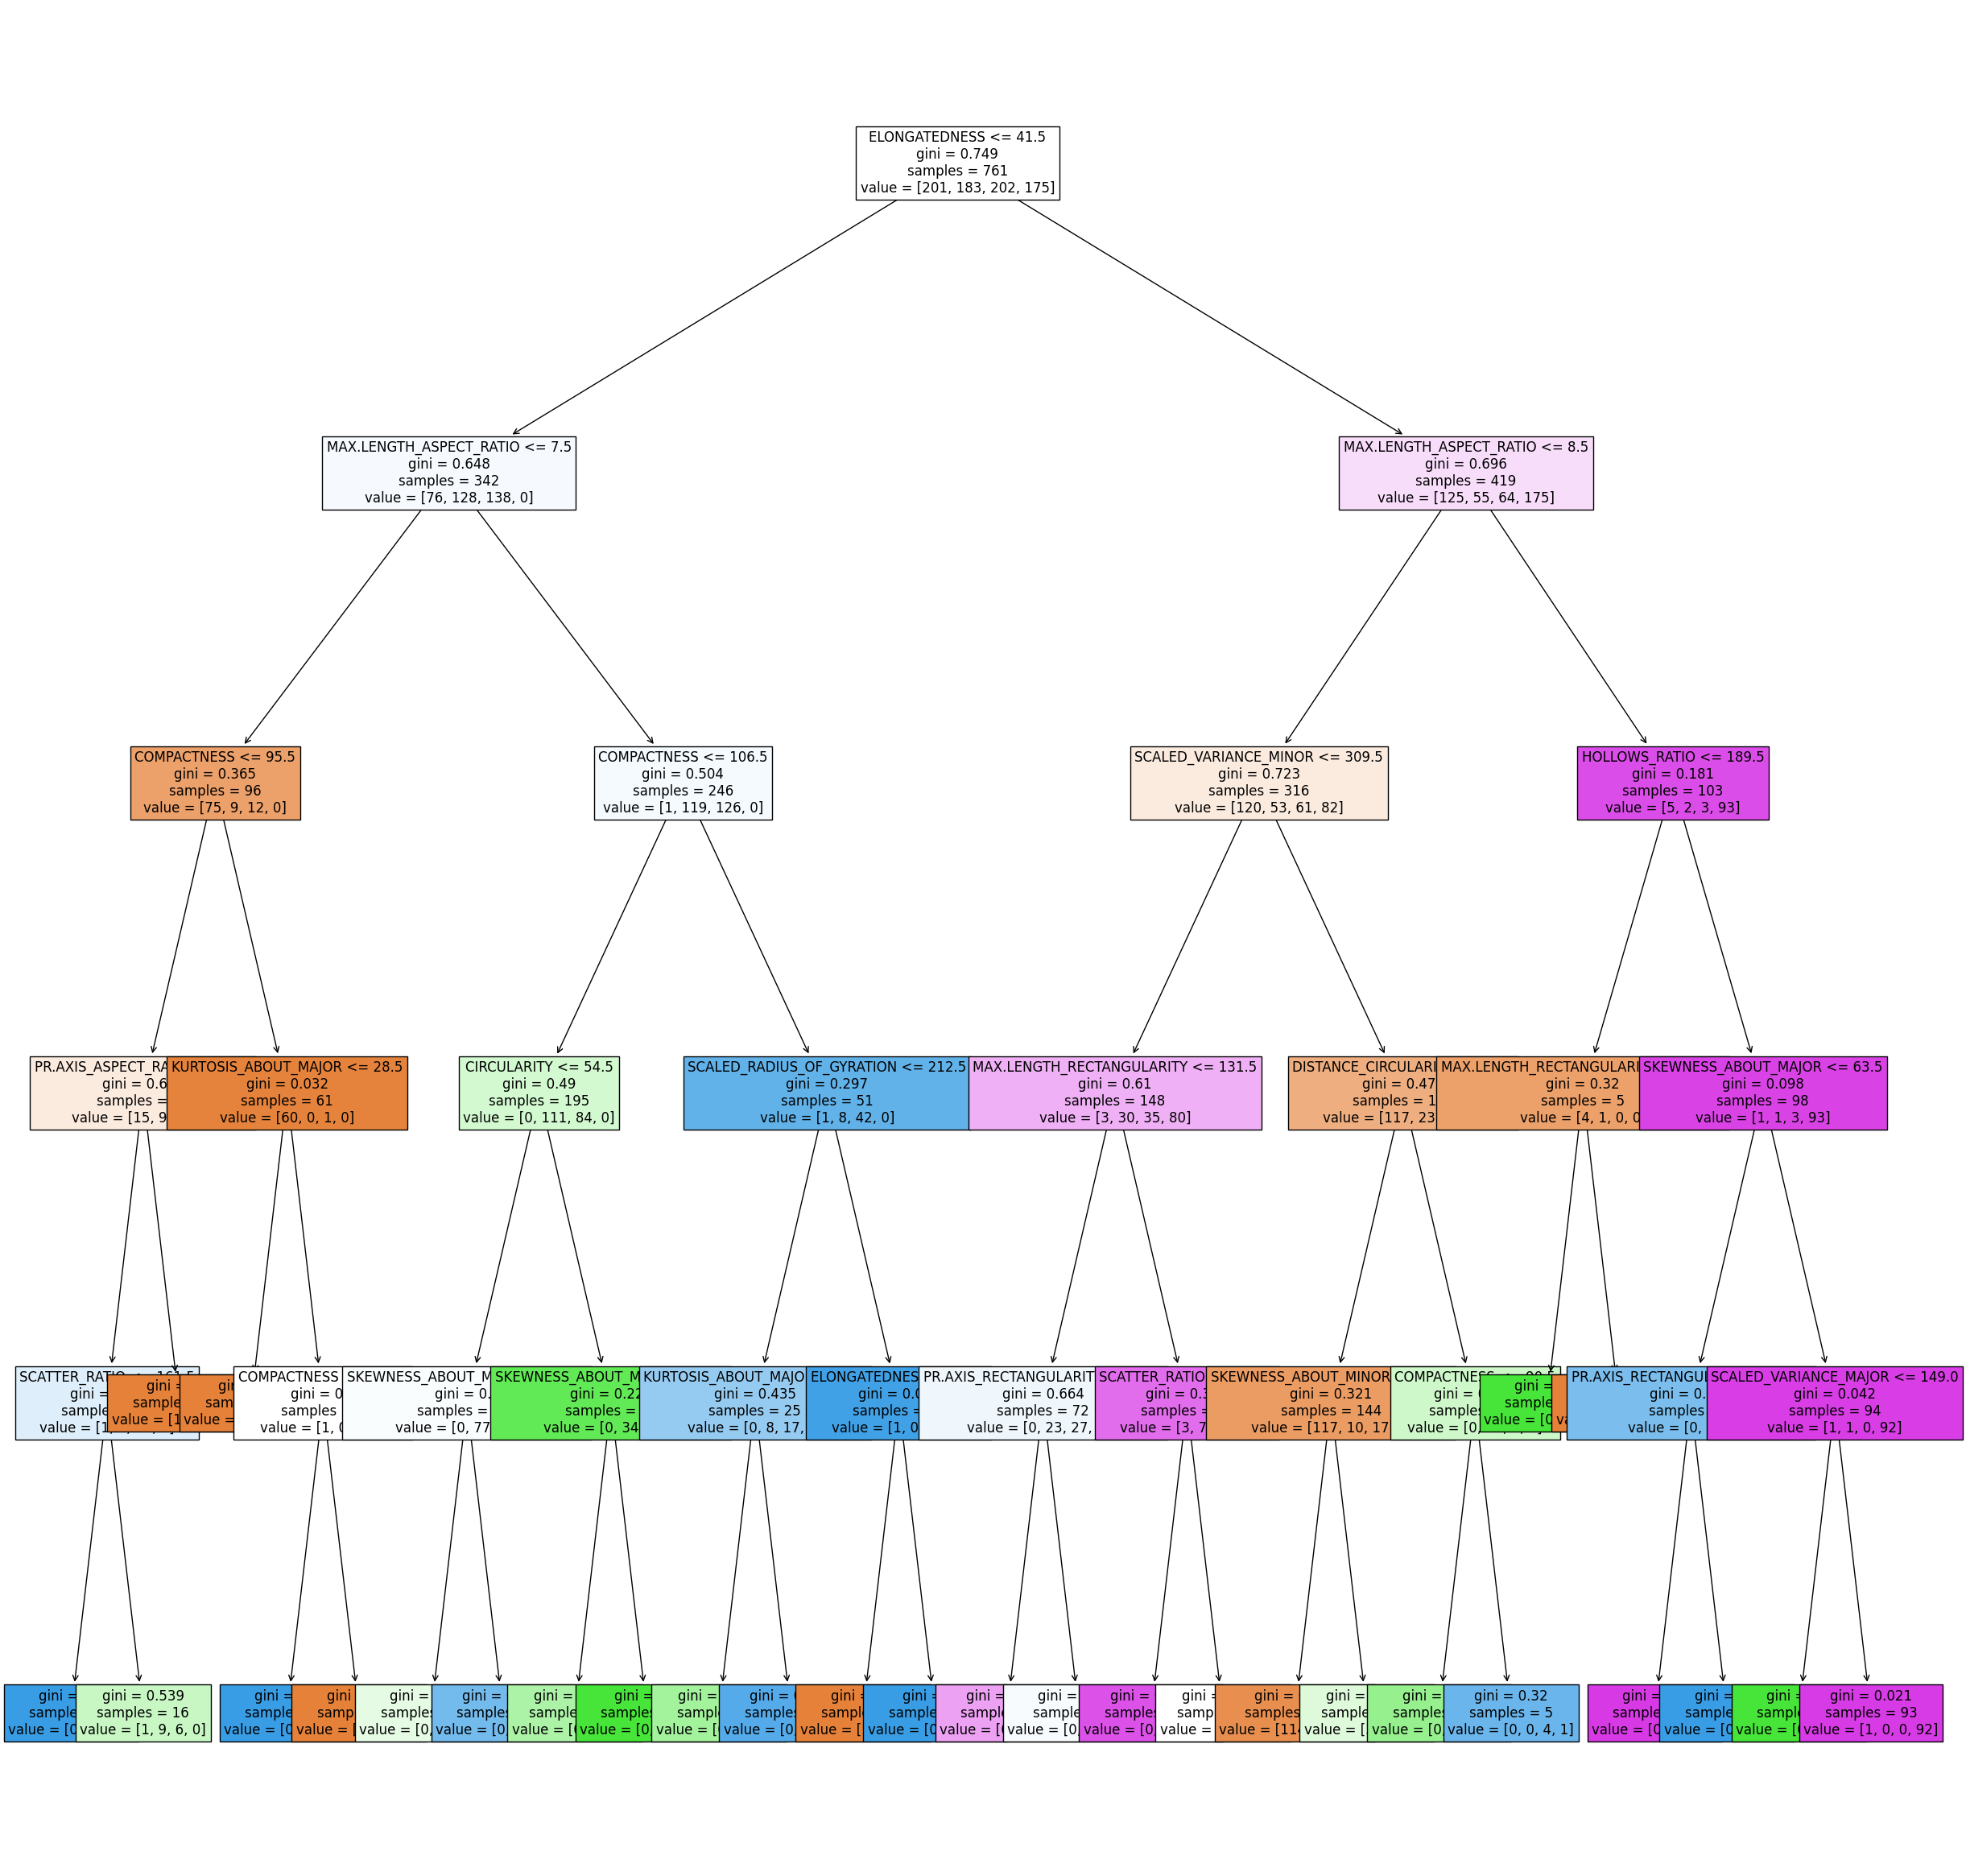

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30,30))
tree.plot_tree(vehicle_clf, feature_names=feature_names, filled=True, fontsize=12)

**3-RandomForest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rnforest_clf = RandomForestClassifier(random_state=random_state)
rnforest_clf.fit(X_train_scaled, y_train)
predictions_rf = rnforest_clf.predict(X_test_scaled)

print(accuracy_score(y_test, predictions_rf))

0.8235294117647058


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       0.84      0.72      0.78        29
           2       0.57      0.53      0.55        15
           3       0.89      1.00      0.94        24

    accuracy                           0.82        85
   macro avg       0.80      0.81      0.80        85
weighted avg       0.82      0.82      0.82        85



**4-Gridsearch**


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rnforest_clf = RandomForestClassifier(random_state=random_state)

grid_search = GridSearchCV(estimator=rnforest_clf, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_rnforest_clf = grid_search.best_estimator_

predictions_rf_best = best_rnforest_clf.predict(X_test_scaled)

print("Best Parameters:", best_params)
print("Best Model Accuracy:", accuracy_score(y_test, predictions_rf_best))


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best Model Accuracy: 0.7411764705882353


**5-Bagging**

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=0), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=0)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.7411764705882353


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.71      0.76      0.73        29
           2       0.29      0.27      0.28        15
           3       0.83      0.83      0.83        24

    accuracy                           0.73        85
   macro avg       0.71      0.70      0.70        85
weighted avg       0.73      0.73      0.73        85



**6-Voting**

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
log_clf = LogisticRegression(solver="lbfgs", random_state = random_state)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state = random_state)
svm_clf = SVC(gamma="scale", probability=True, random_state = random_state)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [ ]:
voting_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=1)),
                             ('rf', RandomForestClassifier(random_state=1)),
                             ('svc', SVC(probability=True, random_state=1))])

In [ ]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression 0.6823529411764706
RandomForestClassifier 0.8
SVC 0.4117647058823529


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier 0.6941176470588235


**7-LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=1, solver='lbfgs', multi_class='multinomial').fit(X, y.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
clf.predict(X)

clf.score(X, y)

0.723404255319149

**8-SVC**

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='rbf')

svm_clf.fit(X_train_scaled, y_train)

predictions_svm = svm_clf.predict(X_test_scaled)

accuracy_svm = accuracy_score(y_test, predictions_svm)
print("Accuracy with SVM (RBF Kernel):", accuracy_svm)

Accuracy with SVM (RBF Kernel): 0.7294117647058823


**9-GradientBoosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Gradient Boosting Accuracy: {accuracy_gb}')

Gradient Boosting Accuracy: 0.8235294117647058


**10-XGBClassifier**

In [ ]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb}')


XGBoost Accuracy: 0.788235294117647


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       0.82      0.62      0.71        29
           2       0.47      0.53      0.50        15
           3       0.89      1.00      0.94        24

    accuracy                           0.79        85
   macro avg       0.77      0.79      0.77        85
weighted avg       0.79      0.79      0.78        85

